In [8]:
# Read MNIST data
import pandas as pd
import numpy as np
import time
from datetime import datetime
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
# import seaborn as sns; sns.set(color_codes=True)
data = pd.read_csv('MNIST_100.csv')

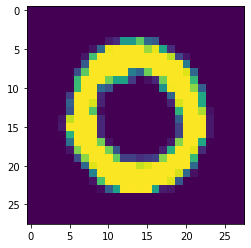

In [2]:
# make two variables - X and y
y = data.iloc[:, 0]
X = data.drop('label', axis=1)
# display the first image
import matplotlib.pyplot as plt
img = np.array(X[0:1]).reshape(28, 28) / 255
plt.imshow(img)
plt.show()

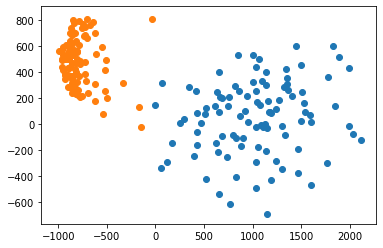

In [3]:
# Visualize data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
PCAX = pca.transform(X)

plt.scatter(PCAX[0:100, 0], PCAX[0:100, 1]) # Digit 0
plt.scatter(PCAX[100:200, 0], PCAX[100:200, 1]) # Digit 1
plt.show()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.026s...
[t-SNE] Computed neighbors for 1000 samples in 1.030s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 499.956951
[t-SNE] Computed conditional probabilities in 0.014s
[t-SNE] Iteration 50: error = 82.5595627, gradient norm = 0.3700617 (50 iterations in 0.080s)
[t-SNE] Iteration 100: error = 79.6173859, gradient norm = 0.3711069 (50 iterations in 0.080s)
[t-SNE] Iteration 150: error = 79.8735962, gradient norm = 0.3619043 (50 iterations in 0.088s)
[t-SNE] Iteration 200: error = 80.0473022, gradient norm = 0.3742411 (50 iterations in 0.084s)
[t-SNE] Iteration 250: error = 79.8457565, gradient norm = 0.3787859 (50 iterations in 0.075s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.845757
[t-SNE] Iteration 300: error = 1.4812131, gradient norm = 0.0026169 (50 iterations in 0.071s)
[t-SNE] Iteration 350: error = 1.2732196, gradient norm = 0.000

/Users/mamun/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

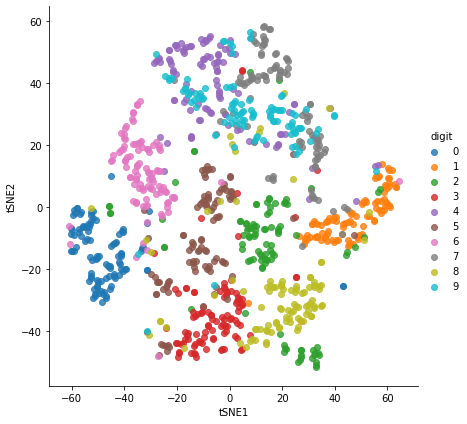

In [10]:
label = ["0","1","2","3","4","5","6","7","8","9"]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=2, perplexity=10, n_iter=600)

# fittint the tsne
tsne_results = tsne.fit_transform(X)
df_t = pd.DataFrame(data=tsne_results, columns=['tSNE1','tSNE2'])

# for each cancer
j=0
for i in label:
    y=y.replace(j, i)
    j+=1

df_t['digit'] = y

fig = plt.figure()
fig = sns.lmplot(x='tSNE1', y='tSNE2', data=df_t, hue='digit', fit_reg=False, legend=1, size=6)
# fig.show()
# fig.savefig(PATH+modelName+"-tSNE-tumor-feature-normal-sample_80.pdf")